<a href="https://colab.research.google.com/github/MarcosArize/Projetos-Ciencia-de-Dados/blob/main/Previs%C3%A3o_de_Custos_de_Planos_de_Sa%C3%BAde_com_Rede_Neural_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv('/content/insurance_modified.csv')

# Análise Exploratória:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1606 entries, 0 to 1605
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1304 non-null   float64
 1   sex       1440 non-null   object 
 2   bmi       1119 non-null   float64
 3   children  1606 non-null   int64  
 4   smoker    1606 non-null   object 
 5   region    1606 non-null   object 
 6   charges   1448 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 88.0+ KB


In [ ]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,NaN,1,no,southeast,1725.55230
2,NaN,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,NaN,male,NaN,0,no,northwest,3866.85520
5,31.0,female,25.740,0,no,southeast,3756.62160
6,46.0,female,NaN,1,no,southeast,8240.58960
7,NaN,female,27.740,3,no,northwest,7281.50560
8,37.0,male,29.830,2,no,northeast,6406.41070
9,60.0,female,25.840,0,no,northwest,28923.13692


In [ ]:
df.describe()

,age,bmi,children,charges
count,1304.000000,1119.000000,1606.000000,1448.000000
mean,66.921779,30.590424,6.161270,13591.780566
std,110.113379,5.883129,21.805787,12521.466159
min,18.000000,15.960000,0.000000,1121.873900
25%,28.000000,26.315000,0.000000,4776.207225
50%,41.000000,30.495000,1.000000,9388.753650
75%,53.000000,34.320000,2.000000,17179.522000
max,500.000000,50.380000,100.000000,63770.428010


In [ ]:
df.isnull().sum()

,0
age,302
sex,166
bmi,487
children,0
smoker,0
region,0
charges,158


In [ ]:
print(f'\n dados duplicados:{df.duplicated().sum()}')


 dados duplicados:268


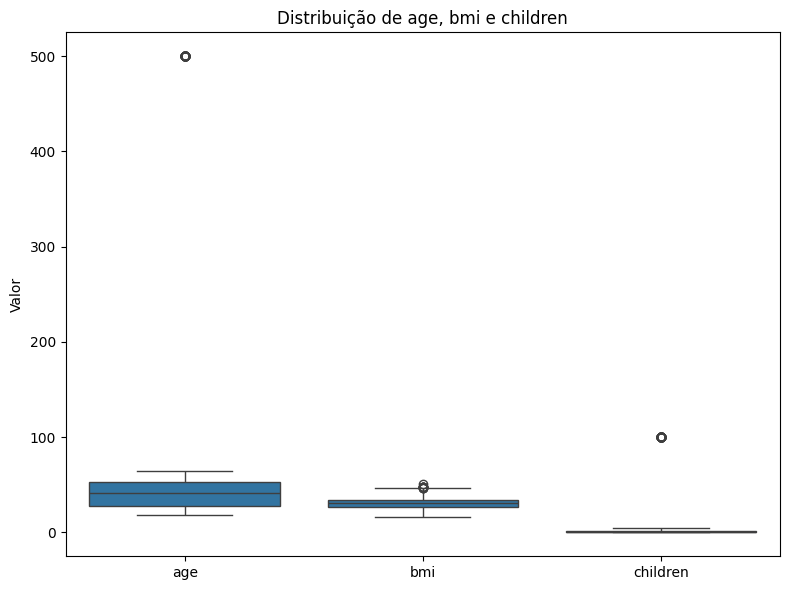

In [ ]:
df_melt = pd.melt(
    df,
    value_vars=['age', 'bmi', 'children'],
    var_name='Variável',
    value_name='Valor'
)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Variável', y='Valor', data=df_melt)
plt.title('Distribuição de age, bmi e children')
plt.xlabel('')
plt.tight_layout()
plt.show()

In [ ]:
#Tratar dados nulos substituindo pela media
imputer = SimpleImputer(strategy='mean')
df[['age','bmi','charges']] = imputer.fit_transform(df[['age','bmi','charges']])

In [ ]:
df['sex'] = df['sex'].map(lambda x: 1 if x == 'male' else 0)
df['smoker'] = df['smoker'].map(lambda x:1 if x=='yes' else 0)
df['region'] = df['region'].map(lambda x: 1 if x== 'southwest' else 2 if x=='southeast' else 3 if x =='northwest' else 4 if x == 'northeast' else 0)

In [ ]:
df.loc[df['age']>110,'age'] = df.loc[df['age']<=110,'age'].max()
df.loc[df['children']>10,'children'] = df.loc[df['children']<=10,'children'].max()

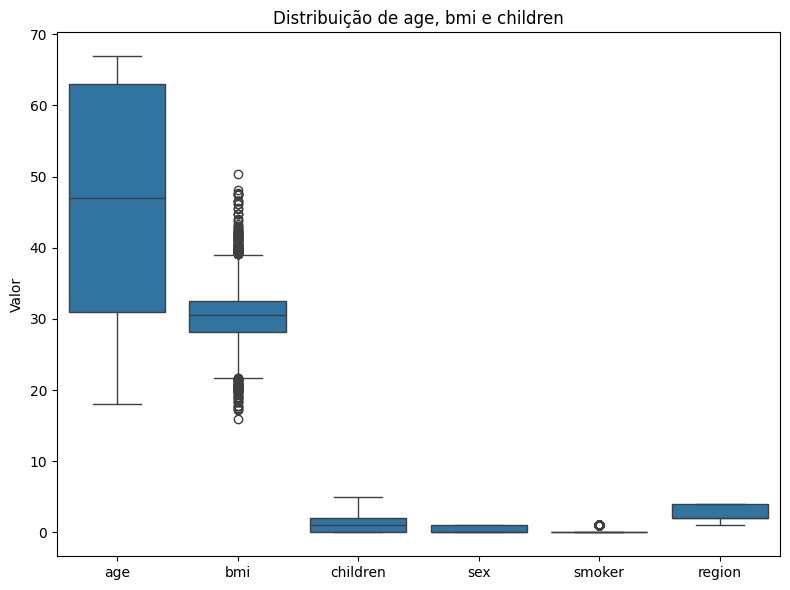

In [ ]:
df_melt = pd.melt(
    df,
    value_vars=['age', 'bmi', 'children','sex','smoker','region'],
    var_name='Variável',
    value_name='Valor'
)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Variável', y='Valor', data=df_melt)
plt.title('Distribuição de age, bmi e children')
plt.xlabel('')
plt.tight_layout()
plt.show()

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,45.987213,0.456652,30.579014,1.295964,0.204783,2.484305,13421.456122
std,16.972440,0.498304,4.987951,1.456114,0.403694,1.104885,11633.801676
min,18.000000,0.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,31.000000,0.000000,28.100000,0.000000,0.000000,2.000000,5232.298287
50%,47.000000,0.000000,30.590424,1.000000,0.000000,2.000000,10600.980150
75%,64.000000,1.000000,32.545000,2.000000,0.000000,3.000000,14443.909263
max,66.921779,1.000000,50.380000,5.000000,1.000000,4.000000,63770.428010


In [ ]:
corr = df.corr()
corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.003265,0.056383,0.022156,0.006737,0.010045,0.188473
sex,-0.003265,1.000000,0.029301,0.006356,0.055316,0.000122,0.040736
bmi,0.056383,0.029301,1.000000,-0.010199,0.002301,-0.122904,0.157684
children,0.022156,0.006356,-0.010199,1.000000,-0.002665,0.022880,0.046928
smoker,0.006737,0.055316,0.002301,-0.002665,1.000000,0.002181,0.760722
region,0.010045,0.000122,-0.122904,0.022880,0.002181,1.000000,0.008811
charges,0.188473,0.040736,0.157684,0.046928,0.760722,0.008811,1.000000


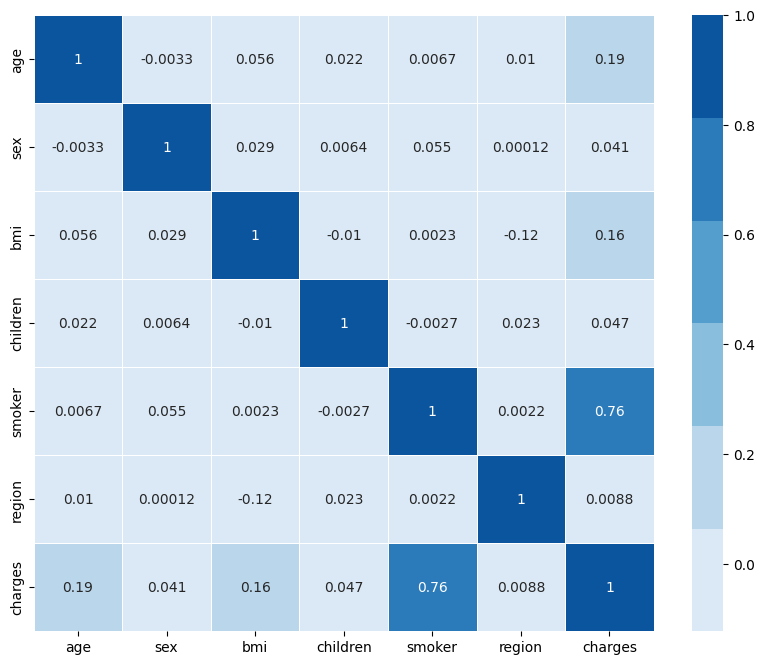

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap=sns.color_palette("Blues"), linewidths=.5, annot=True);

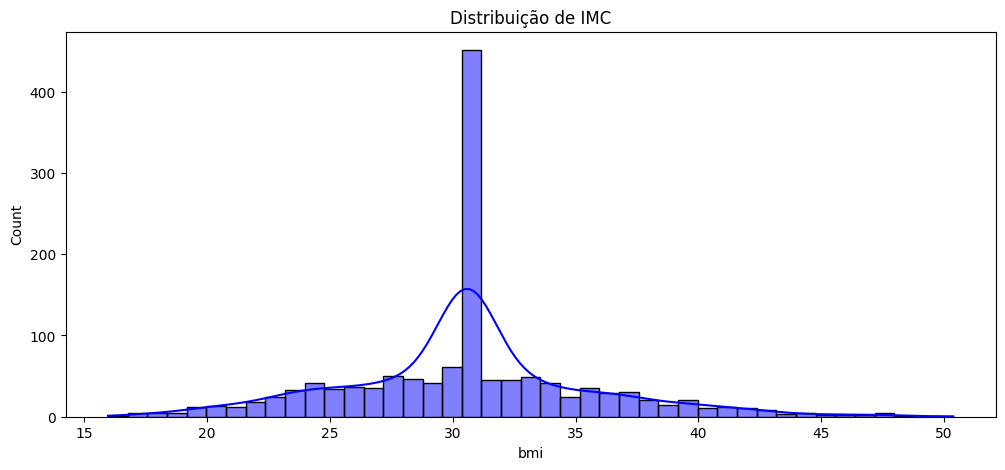

In [ ]:
# Distribuição do IMC
plt.figure(figsize=(12, 5))
plt.title("Distribuição de IMC")
ax = sns.histplot(df["bmi"], color='b', kde=True)

In [ ]:
X = df.drop(columns=['charges'])
y = df['charges']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Carregar biblioteca
from sklearn.neural_network import MLPRegressor

# Criar o modelo
#model = MLPRegressor(hidden_layer_sizes=(10, 10,10), max_iter=1000, random_state=42)
model = MLPRegressor(
    hidden_layer_sizes=(10,10,10),
    activation='relu',        # ou 'tanh' ou 'relu'
    solver='adam',                # melhor para grandes datasets
    learning_rate='adaptive',     # taxa de aprendizado adaptável
    max_iter=1000,
    random_state=42
)
# Treinar o modelo
model.fit(X_train,y_train )

# Fazer previsões
y_pred = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.673699582013602

In [ ]:
# Novos valores de X para predição

# Novos dados para predição
dados_pred = {
    'age': [44, 30, 55, 47],
    'sex': [1, 0, 1, 0],
    'bmi': [30.1, 23, 29.5, 29.37],
    'children': [2, 0, 3, 1],
    'smoker': [0, 1, 1, 0],
    'region': [3, 1, 3, 2]
}
df_dados_pred = pd.DataFrame(dados_pred)
df_dados_pred_scaled = scaler.transform(df_dados_pred)

# Faz a predição para os novos dados
predicoes_Y = model.predict(df_dados_pred_scaled)

# Exibe as predições
print("\n\nPredição do Valor do Plano de Saúde para os novos dados:")
for i, (index, row) in enumerate(df_dados_pred.iterrows()):
    print(f"Dados = {row.values}, Y previsto = {predicoes_Y[i]}")



Predição do Valor do Plano de Saúde para os novos dados:
Dados = [44.   1.  30.1  2.   0.   3. ], Y previsto = 6651.951440992265
Dados = [30.  0. 23.  0.  1.  1.], Y previsto = 22135.39466031663
Dados = [55.   1.  29.5  3.   1.   3. ], Y previsto = 31891.547935123148
Dados = [47.    0.   29.37  1.    0.    2.  ], Y previsto = 7393.767465543058


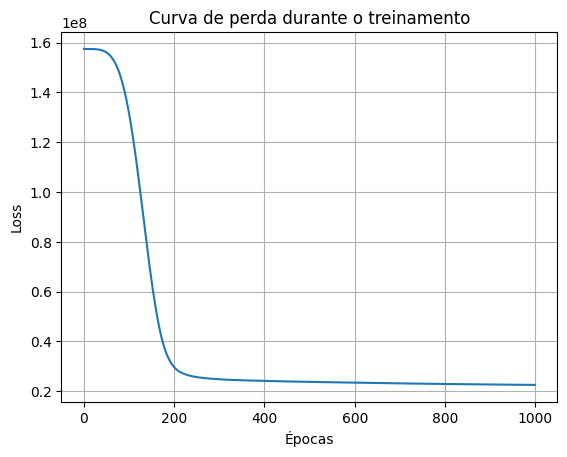

In [ ]:
plt.plot(model.loss_curve_)
plt.title("Curva de perda durante o treinamento")
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


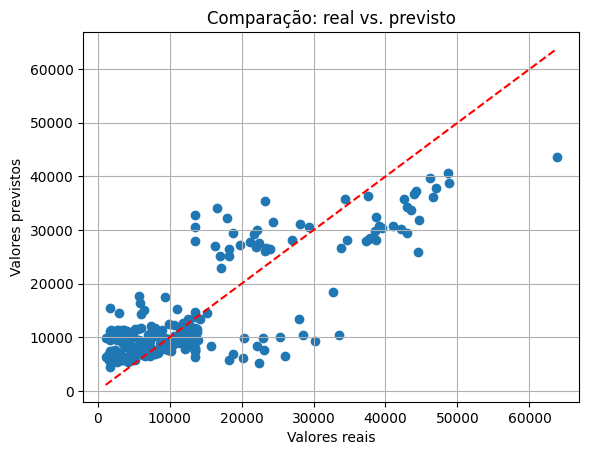

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Valores reais')
plt.ylabel('Valores previstos')
plt.title('Comparação: real vs. previsto')
plt.grid(True)
plt.show()